In [78]:
import pandas as pd
import json
from pathlib import Path


In [79]:

foodtype = Path('label_foodtype.csv')
annotations = Path('youcookii_annotations_trainval.json')

In [80]:
food_df = pd.read_csv(foodtype, header = None)
food_df.columns = ['id', 'recipe_type']
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           110 non-null    int64 
 1   recipe_type  110 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [81]:
food_df.tail(5)

,id,recipe_type
105,421,samosa
106,422,wanton noodle
107,423,singapore curry laksa
108,424,hainanese chicken rice
109,425,masala dosa


In [82]:
# food_df['recipe_type'].tolist()
#Manually inspect and select indian vegetarian dishes
select_recipes = [
                    'onion rings',
                    'pasta salad',
                    'grilled cheese',
                    'mashed potato',
                    'tomato soup',
                    'vegetable biryani',
                    'chapati',
                    'dal makhani',
                    'roti jala',
                    'chana masala',
                    'naan',
                    'samosa',
                    'masala dosa'
]

In [83]:
with open(annotations) as f:
    data = json.load(f)

In [84]:
agg_data = []
for k,v in data['database'].items():
    description = ''
    segment = []
    annot_id = []
    recipe_type =food_df.query(f"id == {v['recipe_type']}")['recipe_type'].tolist()[0]
    for annotation in v.get('annotations', ''):
        description = f'{description} {annotation.get("sentence", "")}.'
        segment.append(annotation.get("segment", ""))
        annot_id.append(annotation.get("id", ""))

    duration =v.get("duration","")
    video_url = v.get('video_url')
    agg_data.append([k,recipe_type,description,  segment, annot_id,duration,video_url])
df = pd.DataFrame(agg_data, columns=['id','recipe_type', 'description','segment', 'annot_id','duration', 'video_url'])   

In [85]:
df.shape

(1790, 7)

In [86]:
select_recipe_df = df.query('recipe_type ==@select_recipes')
select_recipe_df.shape

(239, 7)

In [87]:
select_recipe_df.head(3)

,id,recipe_type,description,segment,annot_id,duration,video_url
0,GLd3aX16zBg,grilled cheese,spread margarine on two slices of white bread...,"[[90, 102], [114, 127], [132, 138], [139, 145]...","[0, 1, 2, 3, 4]",241.62,https://www.youtube.com/watch?v=GLd3aX16zBg
18,Kbrkj7wZ4UA,naan,add baking powder salt and flour to a bowl an...,"[[72, 82], [85, 98], [99, 112], [113, 140], [1...","[0, 1, 2, 3, 4, 5, 6, 7, 8]",466.41,https://www.youtube.com/watch?v=Kbrkj7wZ4UA
23,Gs3OGfQbPjc,onion rings,mix 3 types of flour to a bowl. add 1 egg 1/2...,"[[30, 36], [37, 54], [57, 68], [83, 97], [103,...","[0, 1, 2, 3, 4]",156.53,https://www.youtube.com/watch?v=Gs3OGfQbPjc


In [88]:
from nltk.corpus import wordnet as wn
food = wn.synset('food.n.02')
food_items =list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))

In [89]:
'margarine' in food_items #India food items like biryani, dosa, samosa etc are not found in corpus

False

In [90]:
print(select_recipe_df.query("recipe_type=='vegetable biryani'")['description'].tolist()[1])

heat some oil in a pan. cook the combined spice and vegetables in the pan. add boiled potatoes and paneer to the pan. season the ingredients with salt. add chopped mint and coriander leaves. add green chilis to the pan. add a packet of biryani masala to the pan and stir. add the yogurt and paneer to the pan. boil some water and add oil and spice to it. add the soaked rice to the liquid. put the mixture on rice. add yogurt and nuts.


In [91]:
select_recipe_df['recipe_type'].value_counts()

naan                 23
pasta salad          22
grilled cheese       21
dal makhani          21
mashed potato        21
onion rings          20
tomato soup          19
masala dosa          19
chapati              19
vegetable biryani    19
chana masala         18
samosa               17
Name: recipe_type, dtype: int64

In [92]:
df.head()

,id,recipe_type,description,segment,annot_id,duration,video_url
0,GLd3aX16zBg,grilled cheese,spread margarine on two slices of white bread...,"[[90, 102], [114, 127], [132, 138], [139, 145]...","[0, 1, 2, 3, 4]",241.62,https://www.youtube.com/watch?v=GLd3aX16zBg
1,xHr8X2Wpmno,fattoush,pick the ends off the verdalago. combine lemo...,"[[47, 60], [67, 89], [91, 98], [99, 137], [153...","[0, 1, 2, 3, 4, 5]",206.86,https://www.youtube.com/watch?v=xHr8X2Wpmno
2,V53XmPeyjIU,fried chicken,combine salt butter milk and hot sauce in a b...,"[[16, 26], [33, 36], [46, 53], [60, 89], [93, ...","[0, 1, 2, 3, 4, 5, 6, 7]",189.36,https://www.youtube.com/watch?v=V53XmPeyjIU
3,mZwK0TBI1iY,chicken parmesan,mix bread crumbs and parmesan cheese. pound t...,"[[21, 32], [36, 44], [44, 55], [55, 78], [78, ...","[0, 1, 2, 3, 4, 5, 6, 7]",264.95,https://www.youtube.com/watch?v=mZwK0TBI1iY
4,H_9oM1Y60lU,burger,grill the patties. chop some roasted pepper ...,"[[67, 102], [129, 157], [202, 222], [229, 239]...","[0, 1, 2, 3, 4]",316.44,https://www.youtube.com/watch?v=H_9oM1Y60lU


In [93]:
all_instructions ='.'.join(df['description'].tolist()).strip()

In [94]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lemmatizer import Lemmatizer, ADJ, NOUN, VERB

lemmatizer = nlp.vocab.morphology.lemmatizer

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
def spacy_tokenize(text):
    sentences =sent_tokenize(text)
    all_tokens = []
    for sentence in sentences:
        sentence = sentence.replace('..', '.')
        raw_tokens = [x.text for x in nlp(sentence)]
        tokens = [(x.lemma_,x.pos_) for x in nlp(sentence) 
                                if 
                                    x.text.replace('.', '').strip() not in STOP_WORDS 
                                and 
                                    x.text.replace('.', '').strip() != ''] 
        all_tokens.append(tokens)
    return all_tokens

def get_pos_token(word_splits,tag):
    filter_tokens = []
    for word_split in word_splits:
        pos_tokens =[x[0] for x in word_split if x[1]==tag]
        filter_tokens.append(pos_tokens)
    return filter_tokens


def get_food_tokens(word_splits,ingredients):
    filter_tokens = []
    for word_split in word_splits:
        food_tokens =[x for x in word_split if x in ingredients]
        filter_tokens.append(food_tokens)
    return filter_tokens    



In [95]:
select_recipe_df['description'].head()

0      spread margarine on two slices of white bread...
18     add baking powder salt and flour to a bowl an...
23     mix 3 types of flour to a bowl. add 1 egg 1/2...
26     boil chick peas in pressure cooker with ginge...
27     mix the maida rice flour suji curry leaves sa...
Name: description, dtype: object

In [96]:
select_recipe_df['tokens']= select_recipe_df['description'].apply(lambda x: spacy_tokenize(x))

In [102]:
select_recipe_df['noun_tokens']=select_recipe_df['tokens'].apply(lambda x:get_pos_token(x,'NOUN'))

In [103]:
select_recipe_df['verb_tokens']=select_recipe_df['tokens'].apply(lambda x:get_pos_token(x,'VERB'))


In [119]:
import numpy as np
#Data is downloaded from the url 
#https://dominikschmidt.xyz/simplified-recipes-1M/
with np.load('simplified-recipes-1M.npz',allow_pickle=True) as data:
    recipes = data['recipes']
    ingredients = data['ingredients']
len(ingredients), len(recipes)    


(3500, 1067557)

In [120]:
ingredients = set(ingredients.tolist())


In [131]:
select_recipe_df['food_tokens']= select_recipe_df['noun_tokens'].apply(lambda x:get_food_tokens(x, ingredients))

In [133]:
select_recipe_df.head()

,id,recipe_type,description,segment,annot_id,duration,video_url,tokens,verb_tokens,noun_tokens,food_tokens
0,GLd3aX16zBg,grilled cheese,spread margarine on two slices of white bread...,"[[90, 102], [114, 127], [132, 138], [139, 145]...","[0, 1, 2, 3, 4]",241.62,https://www.youtube.com/watch?v=GLd3aX16zBg,"[[(spread, VERB), (margarine, NOUN), (slice, N...","[[spread], [place], [place, slice], [flip, pre...","[[margarine, slice, bread], [slice, cheese, br...","[[margarine, bread], [cheese, bread], [bread],..."
18,Kbrkj7wZ4UA,naan,add baking powder salt and flour to a bowl an...,"[[72, 82], [85, 98], [99, 112], [113, 140], [1...","[0, 1, 2, 3, 4, 5, 6, 7, 8]",466.41,https://www.youtube.com/watch?v=Kbrkj7wZ4UA,"[[(add, VERB), (bake, VERB), (powder, NOUN), (...","[[add, bake], [add, mince], [add, knead], [spr...","[[powder, salt, flour, bowl, mix], [butter, co...","[[powder, salt, flour, mix], [butter, coriande..."
23,Gs3OGfQbPjc,onion rings,mix 3 types of flour to a bowl. add 1 egg 1/2...,"[[30, 36], [37, 54], [57, 68], [83, 97], [103,...","[0, 1, 2, 3, 4]",156.53,https://www.youtube.com/watch?v=Gs3OGfQbPjc,"[[(mix, VERB), (3, NUM), (type, NOUN), (flour,...","[[mix], [add], [cut], [coat], [fry]]","[[type, flour, bowl], [egg, cup, water, salt, ...","[[flour], [egg, water, salt, sugar, mix], [oni..."
26,dxK5n3J9pdY,chana masala,boil chick peas in pressure cooker with ginge...,"[[136, 152], [178, 198], [208, 230], [240, 264...","[0, 1, 2, 3, 4, 5, 6, 7]",430.38,https://www.youtube.com/watch?v=dxK5n3J9pdY,"[[(boil, VERB), (chick, NOUN), (pea, NOUN), (p...","[[boil], [add, pan], [remove, add], [add, pan,...","[[chick, pea, pressure, cooker, ginger], [oil,...","[[ginger], [oil], [cumin, flour], [tomato], [c..."
27,pOWe4zB-E-4,masala dosa,mix the maida rice flour suji curry leaves sa...,"[[5, 78], [78, 114], [130, 150], [155, 162], [...","[0, 1, 2, 3, 4, 5, 6, 7, 8]",275.50,https://www.youtube.com/watch?v=pOWe4zB-E-4,"[[(mix, VERB), (maida, NOUN), (rice, NOUN), (f...","[[mix, curry, leave], [add], [add], [add], [sp...","[[maida, rice, flour, suji, salt, cumin, seed,...","[[rice, flour, salt, cumin], [water, ginger, c..."


In [ ]:
#Need to download the videos from youtube and use the time frame durations in the data frame
#to extract the images from the video
#Ex:https://stackoverflow.com/questions/27481993/extracting-image-from-video-at-a-given-time-using-opencv

In [13]:
len(STOP_WORDS)

326

In [16]:
word_tokens = spacy_tokenize(all_instructions)

In [17]:
len(word_tokens), len(set(word_tokens))

(73076, 2630)

In [20]:
pos_tags=list(set([x[1] for x in word_tokens]))
for pos_tag in pos_tags:
    pos_tokens = [x for x in word_tokens if x[1]==f'{pos_tag}']
    print(pos_tag)
    print(' Total Tokens: ',len(pos_tokens), ', Unique Tokens: ' ,len(set(pos_tokens)))

INTJ
 Total Tokens:1, Unique Tokens:1
SYM
 Total Tokens:56, Unique Tokens:2
ADV
 Total Tokens:531, Unique Tokens:102
PROPN
 Total Tokens:14, Unique Tokens:5
VERB
 Total Tokens:19646, Unique Tokens:509
NUM
 Total Tokens:911, Unique Tokens:74
PART
 Total Tokens:5, Unique Tokens:3
CCONJ
 Total Tokens:3, Unique Tokens:2
X
 Total Tokens:25, Unique Tokens:14
PUNCT
 Total Tokens:29, Unique Tokens:5
PRON
 Total Tokens:1, Unique Tokens:1
ADP
 Total Tokens:62, Unique Tokens:12
DET
 Total Tokens:30, Unique Tokens:5
ADJ
 Total Tokens:6935, Unique Tokens:494
NOUN
 Total Tokens:44827, Unique Tokens:1401


In [40]:
from collections import Counter
def get_top_tokens(tokens,top=100):
    count_dict = Counter(tokens)
    count_dict={k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1],reverse=True)}
    top_tokens = list(count_dict.keys())[:top]
    return top_tokens
nouns_top100 = get_top_tokens(noun_tokens,top=100)
verb_top100 = get_top_tokens(verb_tokens,top=100)



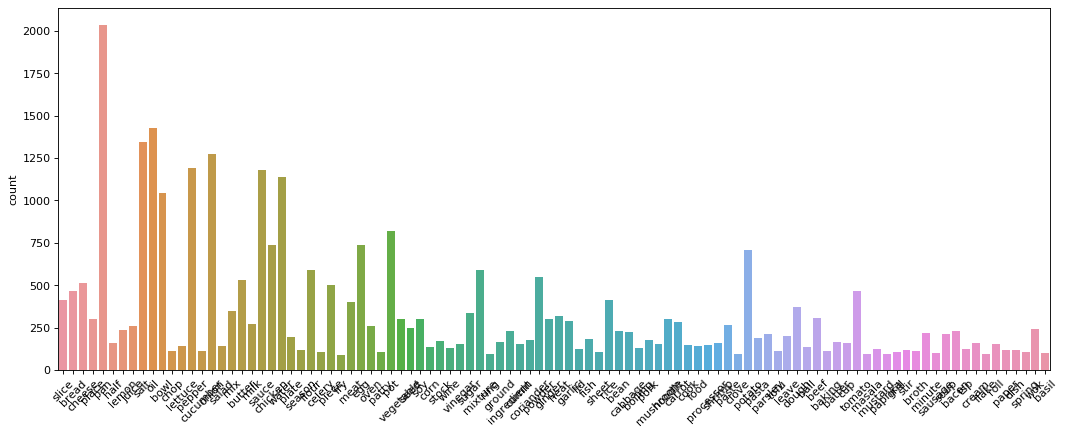

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=80)
filter_noun_tokens =[x for x in noun_tokens if x in nouns_top100] 
plt.xticks(rotation=45)
sns.countplot(filter_noun_tokens)

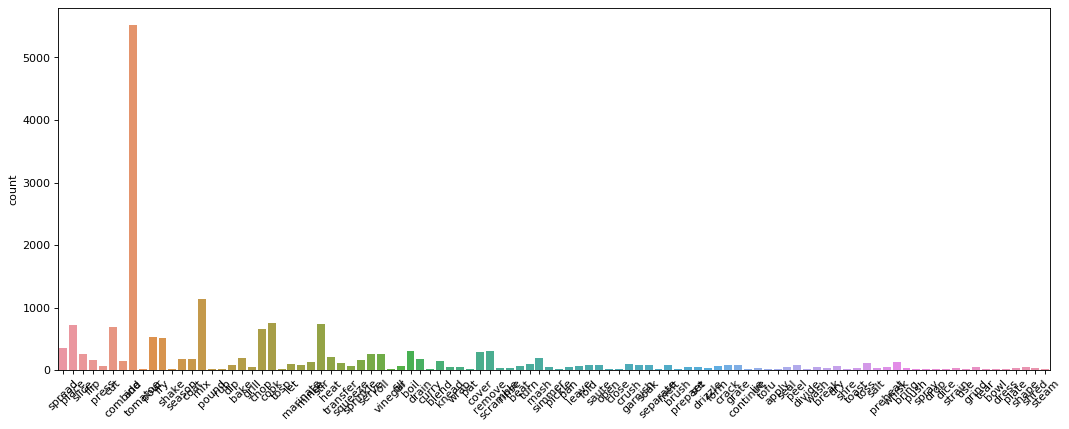

In [45]:
filter_verb_tokens =[x for x in verb_tokens if x in verb_top100] 
figure(figsize=(16, 6), dpi=80)
plt.xticks(rotation=45)
sns.countplot(filter_verb_tokens)